In [1]:
import numpy as np
import numpy.random as r
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

# Reading the Preprocessed Data

In [2]:
df = pd.read_csv('../csv_files/count_vectorized_text.csv')
df.shape

(44266, 16)

In [3]:
OUTPUT_DIR = "../figures/neural-network/"

In [4]:
num_features = df.shape[1] - 1
df1 = df.values
X = df1[:, :num_features]
X = preprocessing.scale(X)
Y = df1[:,num_features:]
Y = np.reshape(Y, (Y.shape[0], ))
print("The shape of X:",X.shape)
print("The shape of Y:",Y.shape)

The shape of X: (44266, 15)
The shape of Y: (44266,)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, shuffle=True)

In [6]:
def plot_graph(title, x, y1, y2):
    plt.title(title)
    plt.ylim([0.50, 0.90])
    plt.xlabel("alpha")
    plt.ylabel("Accuracy")
    plt.plot(x, y1)
    plt.plot(x, y2)
    plt.xscale("log")
    plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
    specific_layer = "-".join([str(x) for x in hidden_layer])  + "-"
    plt.savefig(OUTPUT_DIR + specific_layer + title.replace(" ", "-") + ".png", dpi=500)
    plt.show()

# The Neural Network

In [7]:
def neural_network(activation_func, aval, hidden_layer):
    clf = MLPClassifier(solver='lbfgs',
                        activation=activation_func, \
                        alpha=aval, \
                        hidden_layer_sizes=hidden_layer, \
                        random_state = 1)
    clf.fit(x_train, y_train)
    train_acc = clf.score(x_train, y_train)
    test_acc = clf.score(x_test, y_test)
    return train_acc, test_acc

# Tweaking the Neural Network

In [8]:
activations = ['tanh', 'logistic', 'relu']
alpha_vals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
hidden_layer = (8,)

In [9]:
def init_accs_container():
    train_acc_d = {}
    test_acc_d = {}
    for activation in activations:
        train_acc_d[activation] = []
        test_acc_d[activation] = []
    return train_acc_d, test_acc_d

def run_neural_network(display_output=False):
    train_acc_d, test_acc_d = init_accs_container()
    if display_output:
        print("For the hidden layer:",hidden_layer)
    for activation in activations:
        if display_output:
            print("Using the",activation,"as the activation function:")
        for alpha in alpha_vals:
            train_acc, test_acc = neural_network(activation, alpha, hidden_layer)
            train_acc_d[activation].append(train_acc)
            test_acc_d[activation].append(test_acc)
            if display_output:
                print("\tWith alpha =",alpha)
                print("\t\tTraining Accuracy: {:.4%}".format(train_acc))
                print("\t\tTesting Accuracy : {:.4%}".format(test_acc))
    return train_acc_d, test_acc_d

In [10]:
train_acc_d, test_acc_d = run_neural_network(True)

For the hidden layer: (8,)
Using the tanh as the activation function:
	With alpha = 0.0001
		Training Accuracy: 86.0086%
		Testing Accuracy : 85.5245%
	With alpha = 0.001
		Training Accuracy: 86.0689%
		Testing Accuracy : 85.3980%
	With alpha = 0.01
		Training Accuracy: 85.9393%
		Testing Accuracy : 85.3980%
	With alpha = 0.1
		Training Accuracy: 86.0297%
		Testing Accuracy : 85.3529%
	With alpha = 1
		Training Accuracy: 85.9725%
		Testing Accuracy : 85.5065%
	With alpha = 10
		Training Accuracy: 85.6110%
		Testing Accuracy : 85.0366%
	With alpha = 100
		Training Accuracy: 85.0989%
		Testing Accuracy : 84.7113%
	With alpha = 1000
		Training Accuracy: 80.8639%
		Testing Accuracy : 80.3741%
Using the logistic as the activation function:
	With alpha = 0.0001
		Training Accuracy: 86.0779%
		Testing Accuracy : 85.4703%
	With alpha = 0.001
		Training Accuracy: 86.0327%
		Testing Accuracy : 85.5155%
	With alpha = 0.01
		Training Accuracy: 86.0869%
		Testing Accuracy : 85.4613%
	With alpha = 0

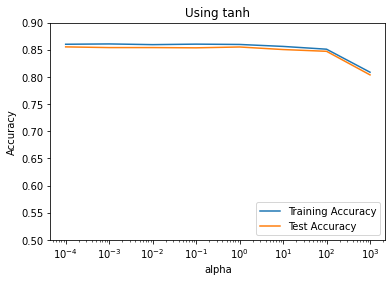

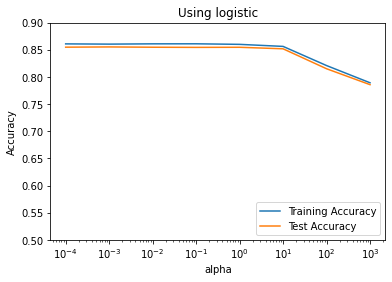

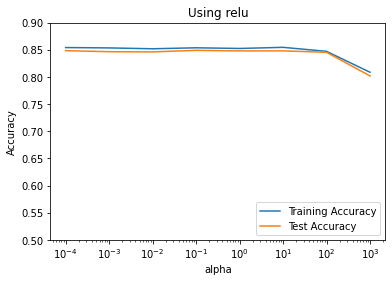

In [11]:
for activation in activations:
    title = "Using " + str(activation)
    plot_graph(title, alpha_vals, train_acc_d[activation], test_acc_d[activation])

# Thoughts
What about changing the hidden layer(s) to have a greater effect?

In [12]:
hidden_layer = (30,)
train_acc_d, test_acc_d = run_neural_network(True)

For the hidden layer: (30,)
Using the tanh as the activation function:
	With alpha = 0.0001
		Training Accuracy: 87.4273%
		Testing Accuracy : 85.8769%
	With alpha = 0.001
		Training Accuracy: 87.3972%
		Testing Accuracy : 85.9583%
	With alpha = 0.01
		Training Accuracy: 87.4123%
		Testing Accuracy : 85.9492%
	With alpha = 0.1
		Training Accuracy: 87.5177%
		Testing Accuracy : 85.8950%
	With alpha = 1
		Training Accuracy: 87.4605%
		Testing Accuracy : 85.9221%
	With alpha = 10
		Training Accuracy: 87.0056%
		Testing Accuracy : 85.6962%
	With alpha = 100
		Training Accuracy: 85.3610%
		Testing Accuracy : 85.0185%
	With alpha = 1000
		Training Accuracy: 80.7795%
		Testing Accuracy : 80.1934%
Using the logistic as the activation function:
	With alpha = 0.0001
		Training Accuracy: 87.1502%
		Testing Accuracy : 85.9492%
	With alpha = 0.001
		Training Accuracy: 87.2074%
		Testing Accuracy : 85.8408%
	With alpha = 0.01
		Training Accuracy: 87.0629%
		Testing Accuracy : 86.0667%
	With alpha = 

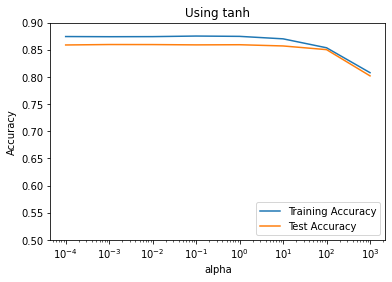

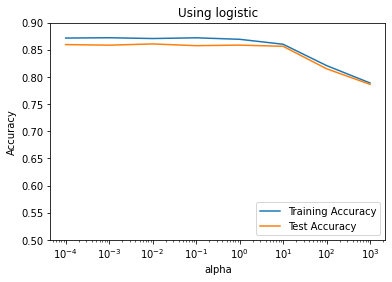

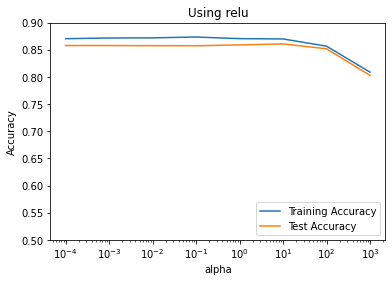

In [13]:
for activation in activations:
    title = "Using " + str(activation)
    plot_graph(title, alpha_vals, train_acc_d[activation], test_acc_d[activation])

In [14]:
hidden_layer = (8, 4, 2)
train_acc_d, test_acc_d = run_neural_network(True)

For the hidden layer: (8, 4, 2)
Using the tanh as the activation function:
	With alpha = 0.0001
		Training Accuracy: 86.1683%
		Testing Accuracy : 85.7052%
	With alpha = 0.001
		Training Accuracy: 86.2014%
		Testing Accuracy : 85.6510%
	With alpha = 0.01
		Training Accuracy: 86.2104%
		Testing Accuracy : 85.6510%
	With alpha = 0.1
		Training Accuracy: 86.1984%
		Testing Accuracy : 85.7595%
	With alpha = 1
		Training Accuracy: 86.2526%
		Testing Accuracy : 85.6330%
	With alpha = 10
		Training Accuracy: 86.1743%
		Testing Accuracy : 85.6059%
	With alpha = 100
		Training Accuracy: 85.7375%
		Testing Accuracy : 85.1631%
	With alpha = 1000
		Training Accuracy: 81.7404%
		Testing Accuracy : 81.2235%
Using the logistic as the activation function:
	With alpha = 0.0001
		Training Accuracy: 86.1622%
		Testing Accuracy : 85.7956%
	With alpha = 0.001
		Training Accuracy: 85.8701%
		Testing Accuracy : 85.2444%
	With alpha = 0.01
		Training Accuracy: 85.9183%
		Testing Accuracy : 85.3980%
	With alph

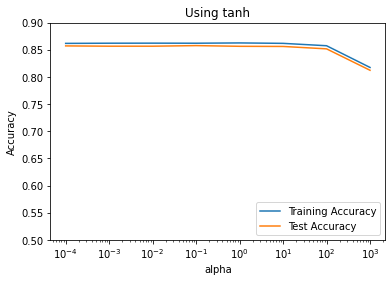

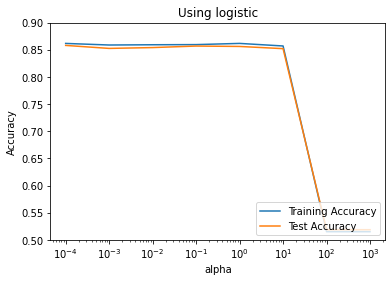

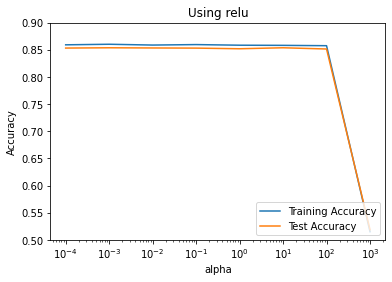

In [15]:
for activation in activations:
    title = "Using " + str(activation)
    plot_graph(title, alpha_vals, train_acc_d[activation], test_acc_d[activation])